## ▶️ YouTube Analytics - SuuZ

SuuZ is my sister's youtube channel, where she use to upload content related to here study and productivity in 2020 during Covid-19 Lockdown. Currently, the channel is not running, but it have a good amount of data. My sister was able to gain:

- Subscribers : 281
- Views : 61,600 
- Likes : 1400
- Comments : 72
- Shares : 122

Using the data which I fetched from the Youtube Analytics, I am going to answer few questions regarding the growth of the channel.

### **Questions**:

**Correlation Analysis**

1. Views and watch time – Are longer watch times associated with higher views?

2. Views and subscribers – Do more views translate to more subscribers?

3. Impressions and Click-Through Rate (CTR%) – Does a stronger impression lead to better engagement?

4. Watch time and average view duration – Are longer videos watched more?

**Audience Retention Analysis**

1. Average view duration vs. Video length – Are longer videos watched in full?

2. Drop-off points – Which duration range has the best retention?

3. Retention Rate (%) – Watch time divided by duration?

**Performance & Growth Analysis**

1. Which videos gained the most subscribers per 1000 views?

2. Which video has the highest watch time per view?

3. Which type of video (topic/length) performs best overall?

4. Are older videos still getting views (long-tail effect)?

5. Is there a pattern between publish day/time and performance?

Here are the columns in the dataset:

- `Content`: The video id

- `Video title`: The video title
 
- `Video publish time`: The day the video was published
 
- `Duration`: The video duration in seconds

- `Views`: The number of views per video
 
- `Watch time`: The estimated amount of video watch time by your audience in hours
 
- `Subscribers`: Change in total subscribers found by subtracting subscribers lost from subscribers gained for the selected date and region.
 
- `Average view duration`: Estimated average minutes watched per video.
 
- `Impressions`: Number of times your videos were shown to viewers.
 
- `Impressions click-through rate (%)`: Number of times viewers clicked your video after seeing an impression

In [1321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1322]:
data = pd.read_csv("Table data.csv")

In [1323]:
data.head()

,Content,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,NaN,61685,1384.3735,281,843001,6.31
1,oEDe6JMwL7Q,Study room make over for NEET aspriant || suuz,"Apr 29, 2020",292.0,58005,1321.6783,269,797168,6.32
2,uu4Cy28Q4Vk,being a one day NEET aspirant || suuz study,"Jun 17, 2020",375.0,395,6.1052,3,5256,6.35
3,4LKXRgTeh0c,ANIME JOURNAL w/me || Izuku Midoriya || Part 1||,"Apr 11, 2021",573.0,343,6.6874,6,4382,5.89
4,9mtaTslQues,5 Study hacks || it's Tania || HACKS || #withme,"Jun 9, 2020",384.0,268,5.4395,2,3326,6.76


In [1324]:
data.drop(columns=["Content"], inplace=True)

In [1325]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,NaN,NaN,NaN,61685,1384.3735,281,843001,6.31
1,Study room make over for NEET aspriant || suuz,"Apr 29, 2020",292.0,58005,1321.6783,269,797168,6.32
2,being a one day NEET aspirant || suuz study,"Jun 17, 2020",375.0,395,6.1052,3,5256,6.35
3,ANIME JOURNAL w/me || Izuku Midoriya || Part 1||,"Apr 11, 2021",573.0,343,6.6874,6,4382,5.89
4,5 Study hacks || it's Tania || HACKS || #withme,"Jun 9, 2020",384.0,268,5.4395,2,3326,6.76


In [1326]:
data.drop(index=0, inplace=True)

In [1327]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
1,Study room make over for NEET aspriant || suuz,"Apr 29, 2020",292.0,58005,1321.6783,269,797168,6.32
2,being a one day NEET aspirant || suuz study,"Jun 17, 2020",375.0,395,6.1052,3,5256,6.35
3,ANIME JOURNAL w/me || Izuku Midoriya || Part 1||,"Apr 11, 2021",573.0,343,6.6874,6,4382,5.89
4,5 Study hacks || it's Tania || HACKS || #withme,"Jun 9, 2020",384.0,268,5.4395,2,3326,6.76
5,5 tips for notes making || notes || tips,"Apr 21, 2020",219.0,235,3.4274,9,1888,9.16


In [1328]:
print(data['Video title'].count())

24


In [1329]:
data.isnull().sum()

Video title                           0
Video publish time                    0
Duration                              0
Views                                 0
Watch time (hours)                    0
Subscribers                           0
Impressions                           0
Impressions click-through rate (%)    0
dtype: int64

In [1330]:
data.duplicated().sum()

np.int64(0)

<Axes: ylabel='Views'>

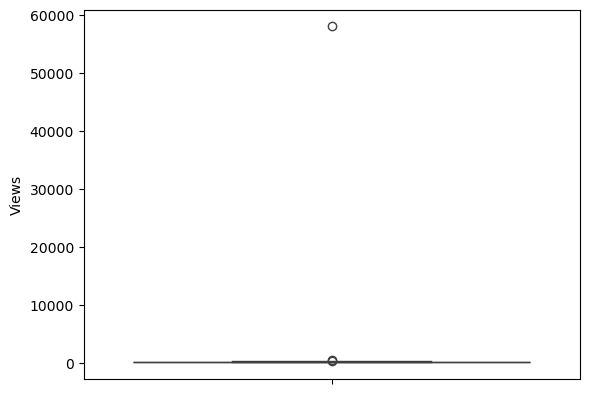

In [1331]:
sns.boxplot(data=data['Views'])

Here one of my sister's video went viral and got 58,000 views, I have to remove this video's details. Else it would create an imbalance in the data. You can check it already on the above boxplot.

In [1332]:
data.drop(index=1, inplace=True)

In [1333]:
data.dtypes

Video title                            object
Video publish time                     object
Duration                              float64
Views                                   int64
Watch time (hours)                    float64
Subscribers                             int64
Impressions                             int64
Impressions click-through rate (%)    float64
dtype: object

In [1334]:
data['Video publish time'] = pd.to_datetime(data['Video publish time'])

# Sort by date
data = data.sort_values(by='Video publish time')

### **Correlation Analysis**

#### 1. Views and watch time – Are longer watch times associated with higher views?

In [1335]:
data_watch_time_views = data[['Watch time (hours)', 'Views']]

In [1336]:
data_corr = data_watch_time_views.corr()

In [1337]:
data_corr

,Watch time (hours),Views
Watch time (hours),1.000000,0.863895
Views,0.863895,1.000000


<Axes: >

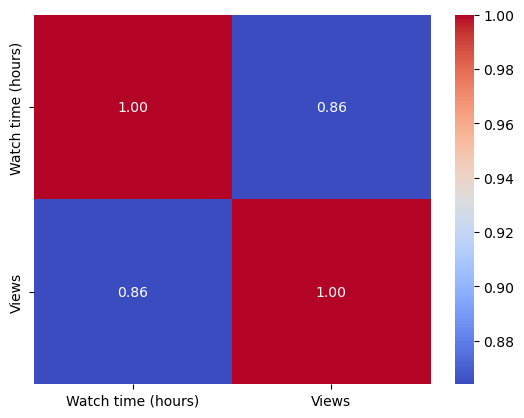

In [1338]:
sns.heatmap(data=data_corr, annot=True, cmap="coolwarm", fmt='.2f')

#### 2. Views and subscribers – Do more views translate to more subscribers?

In [1339]:
data_views_subs = data[['Views','Subscribers']]

In [1340]:
data_views_subs = data_views_subs.sort_values(by='Subscribers')

In [1341]:
data_views_subs = data_views_subs[(data_views_subs['Subscribers'] >= 0)]

In [1342]:
data_views_subs

,Views,Subscribers
10,159,0
17,109,0
21,76,0
24,44,0
23,50,0
12,146,1
22,62,1
15,115,2
4,268,2
9,159,2


In [1343]:
data_corr = data_views_subs.corr()

In [1344]:
data_corr

,Views,Subscribers
Views,1.00000,0.55093
Subscribers,0.55093,1.00000


<Axes: >

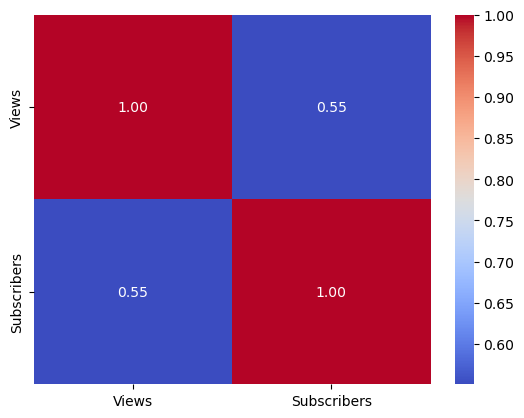

In [1345]:
sns.heatmap(data=data_corr, annot=True, cmap="coolwarm", fmt = '.2f')

#### 3. Impressions and Click-Through Rate (CTR%) – Does a stronger impression lead to better engagement?

In [1346]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48


In [1347]:
data_implressions_ctr = data[['Impressions','Impressions click-through rate (%)']]

In [1348]:
data_implressions_ctr.head()

,Impressions,Impressions click-through rate (%)
19,533,13.32
17,1451,6.00
5,1888,9.16
8,2142,4.90
9,2278,4.48


In [1349]:
data_corr = data_implressions_ctr.corr()

<Axes: >

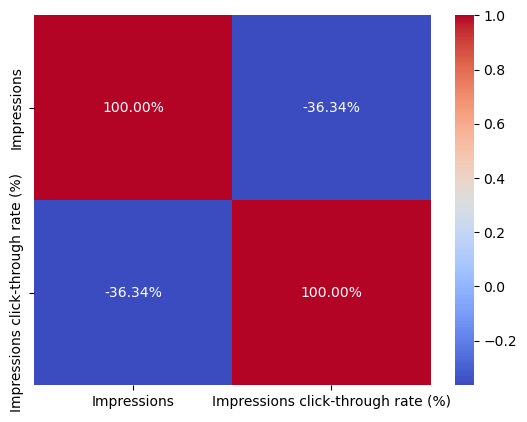

In [1350]:
sns.heatmap(data=data_corr, annot=True, cmap='coolwarm', fmt='.2%')

#### 4. Watch time and average view duration – Are longer videos watched more?

In [1351]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48


In [1352]:
data_duration_wt = data[['Duration', 'Watch time (hours)', 'Views']]

In [1353]:
data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\3159645913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']


In [1354]:
data_duration_wt.head()

,Duration,Watch time (hours),Views
19,414.0,0.011777,93
17,280.0,0.009939,109
5,219.0,0.014585,235
8,366.0,0.018687,160
9,1125.0,0.010504,159


In [1355]:
data_duration_wt.drop(columns='Views', inplace=True)
data_duration_wt = data_duration_wt.rename(columns={'Watch time (hours)':'Avg View Duration'})

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\3277890947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt.drop(columns='Views', inplace=True)


In [1356]:
data_corr = data_duration_wt.corr()
data_corr

,Duration,Avg View Duration
Duration,1.000000,0.284382
Avg View Duration,0.284382,1.000000


<Axes: >

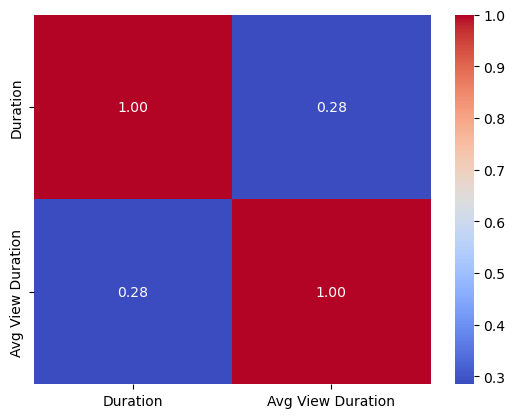

In [1357]:
sns.heatmap(data=data_corr, cmap='coolwarm', annot=True, fmt='.2f')

### **Audience Retention Analysis**

#### 1. Average view duration vs. Video length – Are longer videos watched in full?

In [1358]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48


In [1359]:
data_duration_wt = data[['Duration','Watch time (hours)', 'Views']]

In [1360]:
data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\3159645913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']


In [1361]:
data_duration_wt.head()

,Duration,Watch time (hours),Views
19,414.0,0.011777,93
17,280.0,0.009939,109
5,219.0,0.014585,235
8,366.0,0.018687,160
9,1125.0,0.010504,159


In [1362]:
data_duration_wt.drop(columns='Views', inplace=True)
data_duration_wt = data_duration_wt.rename(columns={'Watch time (hours)':'Avg View Duration'})

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\3277890947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt.drop(columns='Views', inplace=True)


In [1363]:
data_corr = data_duration_wt.corr()
data_corr

,Duration,Avg View Duration
Duration,1.000000,0.284382
Avg View Duration,0.284382,1.000000


<Axes: >

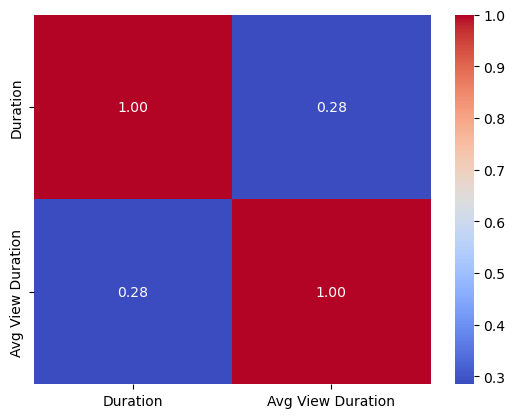

In [1364]:
sns.heatmap(data=data_corr, cmap='coolwarm', annot=True, fmt='.2f')

#### 2. Drop-off points – Which duration range has the best retention?

In [1365]:
data.head()


,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48


In [1366]:
data_duration_wt = data[['Duration', 'Watch time (hours)', 'Views']]
data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']
data_duration_wt.head()
data_duration_wt.drop(columns='Views', inplace=True)
data_duration_wt = data_duration_wt.rename(columns={'Watch time (hours)':'Avg View Duration'})

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\217604486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt['Watch time (hours)'] = data_duration_wt['Watch time (hours)'] / data_duration_wt['Views']
C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\217604486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration_wt.drop(columns='Views', inplace=True)


In [1367]:
data_duration_wt['Avg View Duration'] = data_duration_wt['Avg View Duration'] * 3600

In [1368]:
data_duration_wt.head()

,Duration,Avg View Duration
19,414.0,42.398710
17,280.0,35.782018
5,219.0,52.504851
8,366.0,67.272750
9,1125.0,37.813585


Text(0, 0.5, 'Avg View Duration (Seconds)')

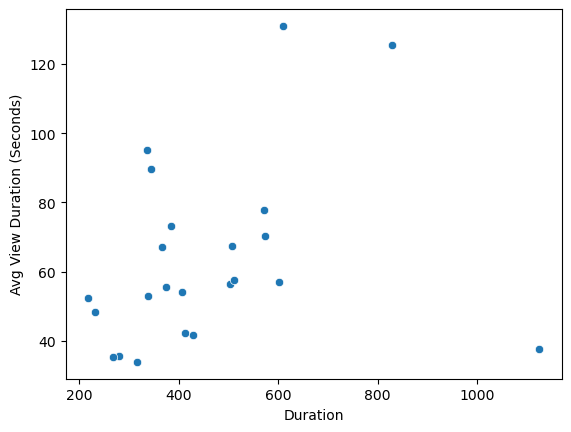

In [1369]:
sns.scatterplot(x = data_duration_wt['Duration'], y = data_duration_wt['Avg View Duration'])
plt.ylabel("Avg View Duration (Seconds)")

#### 3. Retention Rate (%) – Watch time divided by duration?

In [1370]:
retention_rate = (data['Watch time (hours)'] * 3600) / data['Duration']

In [1371]:
retention_rate

19     9.524348
17    13.929429
5     56.340822
8     29.408852
9      5.344320
20    11.584238
4     50.995313
2     58.609920
6     43.600172
15    12.912048
7     25.965799
12    19.455621
11    23.592376
10    21.632098
21    16.322754
22     5.886389
24     4.725570
23    14.177143
13    14.755078
3     42.015079
18    10.285953
14    15.526880
16    28.547478
dtype: float64

In [1372]:
data['Retention Rate'] = retention_rate

<Axes: xlabel='Video publish time', ylabel='Retention Rate'>

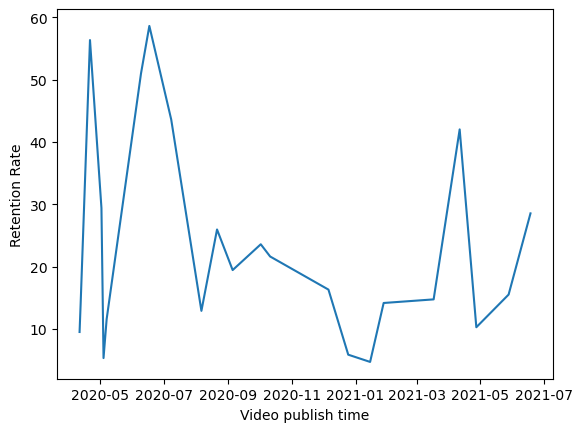

In [1373]:
sns.lineplot(x = data['Video publish time'], y=data['Retention Rate'])

### **Performance and Growth Analysis**

#### 1. Which videos gained the most subscribers per view?



In [1374]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Retention Rate
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32,9.524348
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00,13.929429
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16,56.340822
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90,29.408852
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48,5.344320


In [1375]:
data_views_subs = data[['Video title','Views','Subscribers']]
data_views_subs.head()

,Video title,Views,Subscribers
19,Bullet journal cover design || journal || part 1,93,4
17,How to make cover for journal || journal || pa...,109,0
5,5 tips for notes making || notes || tips,235,9
8,My flip journal || bullet journal || $tudy jou...,160,3
9,Study with us while quarantine || study with u...,159,2


In [1376]:
data_views_subs['Subs Gain'] = data_views_subs['Views'] / data_views_subs['Subscribers']

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\4031345234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_views_subs['Subs Gain'] = data_views_subs['Views'] / data_views_subs['Subscribers']


In [1377]:
data_views_subs.head()

,Video title,Views,Subscribers,Subs Gain
19,Bullet journal cover design || journal || part 1,93,4,23.250000
17,How to make cover for journal || journal || pa...,109,0,inf
5,5 tips for notes making || notes || tips,235,9,26.111111
8,My flip journal || bullet journal || $tudy jou...,160,3,53.333333
9,Study with us while quarantine || study with u...,159,2,79.500000


In [1378]:
def clean_title(title):
    # Remove anything after "||" or " | "
    title = title.split(" ")[0:4]
    title = " ".join(title)
    return title + "..."

data_views_subs['Video title'] = data_views_subs['Video title'].apply(clean_title)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\2913999451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_views_subs['Video title'] = data_views_subs['Video title'].apply(clean_title)


<Axes: xlabel='Subs Gain', ylabel='Video title'>

d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


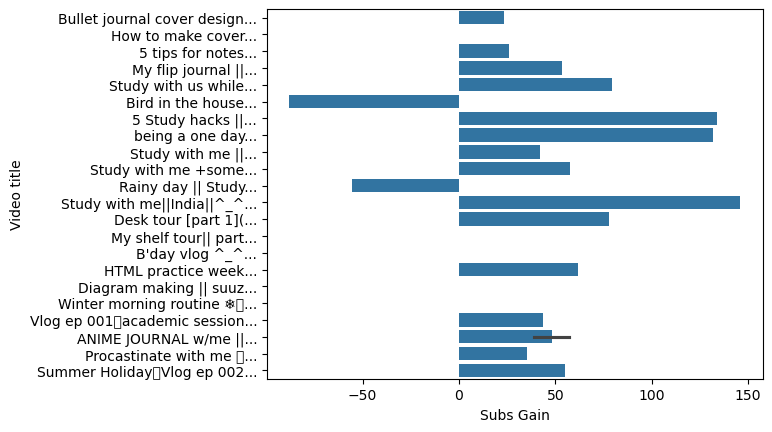

In [1379]:
sns.barplot(y=data_views_subs['Video title'], x=data_views_subs['Subs Gain'])

#### 2. Which video has the highest watch time per view?

In [1380]:
data.head()


,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Retention Rate
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32,9.524348
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00,13.929429
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16,56.340822
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90,29.408852
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48,5.344320


In [1381]:
data_watch_time_views = data[['Video title', 'Watch time (hours)', 'Views']]

In [1382]:
data_watch_time_views.head()

,Video title,Watch time (hours),Views
19,Bullet journal cover design || journal || part 1,1.0953,93
17,How to make cover for journal || journal || pa...,1.0834,109
5,5 tips for notes making || notes || tips,3.4274,235
8,My flip journal || bullet journal || $tudy jou...,2.9899,160
9,Study with us while quarantine || study with u...,1.6701,159


In [1383]:
data_watch_time_views['Watch time (hours)'] = data_watch_time_views['Watch time (hours)'] * 3600

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\474525859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_watch_time_views['Watch time (hours)'] = data_watch_time_views['Watch time (hours)'] * 3600


In [1384]:
data_watch_time_views.head()

,Video title,Watch time (hours),Views
19,Bullet journal cover design || journal || part 1,3943.08,93
17,How to make cover for journal || journal || pa...,3900.24,109
5,5 tips for notes making || notes || tips,12338.64,235
8,My flip journal || bullet journal || $tudy jou...,10763.64,160
9,Study with us while quarantine || study with u...,6012.36,159


In [1385]:
data_watch_time_views['Avg. Watch time per view (in minutes)'] = data_watch_time_views['Watch time (hours)'] / data_watch_time_views['Views']

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\2955334064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_watch_time_views['Avg. Watch time per view (in minutes)'] = data_watch_time_views['Watch time (hours)'] / data_watch_time_views['Views']


In [1386]:
data_watch_time_views.drop(columns=['Watch time (hours)', 'Views'], axis=1, inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\3789975402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_watch_time_views.drop(columns=['Watch time (hours)', 'Views'], axis=1, inplace=True)


In [1387]:
data_watch_time_views.head()

,Video title,Avg. Watch time per view (in minutes)
19,Bullet journal cover design || journal || part 1,42.398710
17,How to make cover for journal || journal || pa...,35.782018
5,5 tips for notes making || notes || tips,52.504851
8,My flip journal || bullet journal || $tudy jou...,67.272750
9,Study with us while quarantine || study with u...,37.813585


In [1388]:
def clean_title(title):
    # Remove anything after "||" or " | "
    title = title.split(" ")[0:4]
    title = " ".join(title)
    return title + "..."

data_watch_time_views['Video title'] = data_watch_time_views['Video title'].apply(clean_title)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\90500174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_watch_time_views['Video title'] = data_watch_time_views['Video title'].apply(clean_title)


In [1389]:
data_watch_time_views.head()

,Video title,Avg. Watch time per view (in minutes)
19,Bullet journal cover design...,42.398710
17,How to make cover...,35.782018
5,5 tips for notes...,52.504851
8,My flip journal ||...,67.272750
9,Study with us while...,37.813585


<Axes: xlabel='Avg. Watch time per view (in minutes)', ylabel='Video title'>

d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


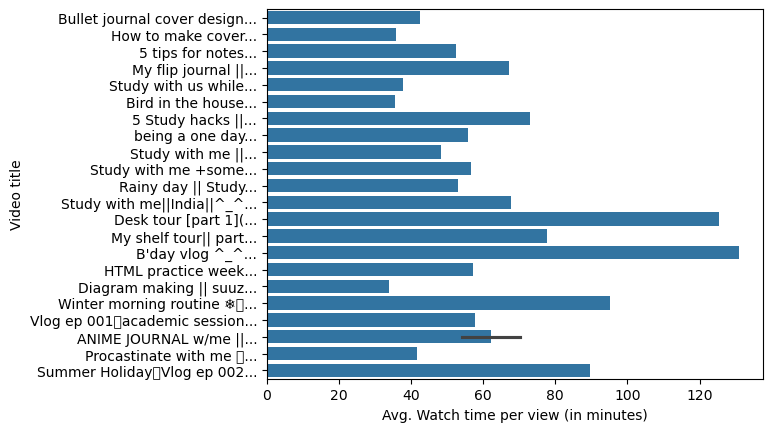

In [1390]:
sns.barplot(x=data_watch_time_views['Avg. Watch time per view (in minutes)'], y=data_watch_time_views['Video title'])

#### 3. Is there a pattern between publish day/time and performance?

In [1391]:
data.head()

,Video title,Video publish time,Duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Retention Rate
19,Bullet journal cover design || journal || part 1,2020-04-11,414.0,93,1.0953,4,533,13.32,9.524348
17,How to make cover for journal || journal || pa...,2020-04-12,280.0,109,1.0834,0,1451,6.00,13.929429
5,5 tips for notes making || notes || tips,2020-04-21,219.0,235,3.4274,9,1888,9.16,56.340822
8,My flip journal || bullet journal || $tudy jou...,2020-05-02,366.0,160,2.9899,3,2142,4.90,29.408852
9,Study with us while quarantine || study with u...,2020-05-04,1125.0,159,1.6701,2,2278,4.48,5.344320


In [1392]:
data_day_views = data[['Views', 'Video publish time']]

In [1393]:
data_day_views['day'] = data_day_views['Video publish time'].dt.day_name()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_8916\473051166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day_views['day'] = data_day_views['Video publish time'].dt.day_name()


In [1394]:
data_day_views.head()

,Views,Video publish time,day
19,93,2020-04-11,Saturday
17,109,2020-04-12,Sunday
5,235,2020-04-21,Tuesday
8,160,2020-05-02,Saturday
9,159,2020-05-04,Monday


In [1395]:
day_views = pd.DataFrame(data_day_views.groupby(['day'])['Views'].sum())
day_views = day_views.reset_index()

In [1396]:
day_views.sort_values('Views',ascending=False,inplace=True)

<Axes: xlabel='day', ylabel='Views'>

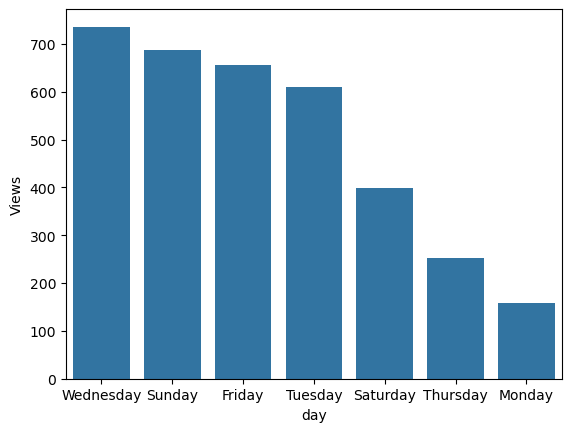

In [1397]:
sns.barplot(x=day_views['day'], y=day_views['Views'])